# Linear Regression in Numpy

This notebook contains the code for linear regression using python and numpy. We are using matplotlib plotting library to visualize the data and our cost values.

The inputs is a randomly generated values which is present in the data folder. It contains 2 files train.csv for training and test.csv for testing our model.



### Import libraries

In [1]:
#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Load training data

In [2]:
#load data as numpy array using genfromtxt
train_data = np.genfromtxt('data/train.csv', delimiter=',', skip_header=1)

#no of samples
m = train_data.shape[0]

#input(Features) last column is the output column so slicing the train_data based on that 
X = train_data[:,:-1]

#As we are using vector implementation adding a column in X with all the value 1
X = np.hstack((np.ones((m,1)),X))

#output
y = train_data[:,-1]

### Visualize data

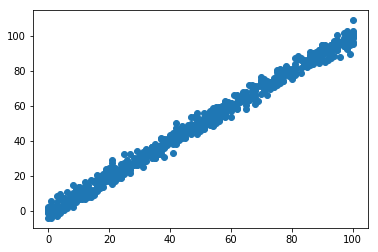

In [3]:
#scatter  plot
plt.scatter(X[:,1:],y)
plt.show()

### Linear Regression Implementation 

In [4]:
#define theta lets take the initial value as 1
theta = np.ones(2)

#learning rate
learning_rate = 0.0005

#no of iterations we want our model to be trained
no_of_iterations = 50000

#to visualise the cost function
cost_arr = []

#counter
i = 1

for i in range(no_of_iterations):
    
    #model/hypothesis function
    h = np.dot(X, theta)
    
    #cost function (mean square error)
    cost = np.sum((h - y) ** 2) / 2 * m
    
    #for better visualization of cost values lets take its square root
    cost_arr.append(np.sqrt(cost))
    
    #applying gradient descent to calculate new theta = theta - (learning_rate/m * summation[(h-y)*x]) -> delta
    #summation can be replace by matrix multiplication
    delta = (learning_rate/m) * np.dot(X.T, (h-y))
    theta = theta - delta
    
    i = i + 1;


### Plot cost values

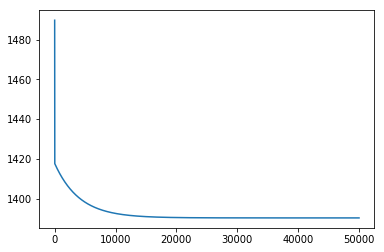

In [5]:
plt.plot(cost_arr)
plt.show()

### Plot the linear line generated by the model


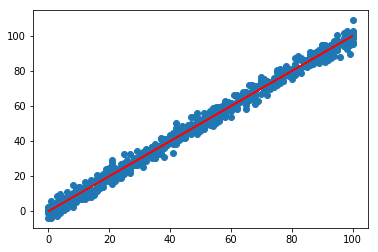

In [6]:
#lets first plot the scatter graph
plt.scatter(X[:,1:],y)
#derived linear equation
plt.plot(X[:,1:], np.dot(X, theta), 'r')
plt.show()

### Prediction on test data

Our model is ready lets apply it on test data

In [7]:
#load test data as numpy array using genfromtxt
test_data = np.genfromtxt('data/test.csv', delimiter=',', skip_header=1)

#no of test samples
test_m = test_data.shape[0]

#test input(Features) 
test_X = test_data[:,:-1]

#As we are using vector implementation adding a column in test_X with all the value 1
test_X = np.hstack((np.ones((test_m,1)),test_X))

#test output
test_y = test_data[:,-1]

#predict
predict = np.dot(test_X, theta)

### Comparing our model with scikit library

Lets compare our model with the scikit linear model. we have used mean square error and variance values for model comparison.


In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score

#train the model with training data
regr = linear_model.LinearRegression()
regr.fit(X,y)

#Predict our test data
sklearn_predict = regr.predict(test_X)

print('Sklearn')
#coefficients
print('Coefficients: {}'.format(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(sklearn_predict, test_y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(test_y, sklearn_predict))

print('\n')

print('Our Model')
#coefficients
print('Coefficients: {}'.format(theta))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(predict, test_y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(test_y, predict))


Sklearn
Coefficients: [0.         1.00077825]
Mean squared error: 9.43
Variance score: 0.99


Our Model
Coefficients: [-0.11802994  1.00074639]
Mean squared error: 9.44
Variance score: 0.99


As we see our model mean square error and variance is approximately equal to the sklearn fit. It means we have did a good job in modeling linear regression